In [2]:
from pymongo import MongoClient
import matplotlib.pyplot as plt
import pandas as pd
client = MongoClient('localhost', 27017)
db = client.hotels
#reviews_collection= db.ta_review_details_hotels
users_collection= db.tripadvisor_users

In [3]:
def memsince_date_trim():
    memsince = users_collection.aggregate(
    [
        {
            "$project" : {
                "_id" : "$_id",
                "name": "$user_name_list",
                "memdate": {"$split": ["$member_since_list", " "]}
        },
    },
    { "$unwind" : "$memdate" },
    {
        "$group" : {
            "_id" : "$memdate",
            "count" : {
                "$sum" : 1.0
            }
        }
    },
    { "$sort" : { "_id" : -1 } }
    ],
    );
    return memsince

In [4]:
memsince_dates = pd.DataFrame(list(memsince_date_trim()))[4:]
print(memsince_dates)

     _id   count
4   2018   605.0
5   2017  1531.0
6   2016  1601.0
7   2015  1710.0
8   2014  1590.0
9   2013  1418.0
10  2012  1499.0
11  2011   961.0
12  2010   976.0
13  2009   922.0
14  2008   856.0
15  2007   627.0
16  2006   295.0
17  2005   237.0
18  2004    66.0
19  2003    41.0
20  2002     3.0


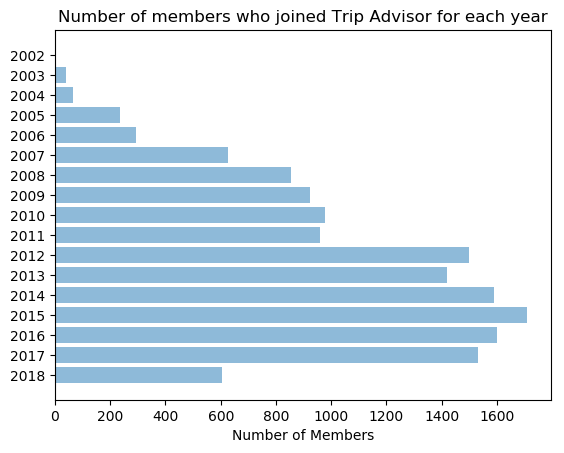

In [5]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
members = memsince_dates['_id']
y_pos = np.arange(len(members))
counts = memsince_dates['count']
 
plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, members)
plt.xlabel('Number of Members')
plt.title('Number of members who joined Trip Advisor for each year')
 
plt.show()